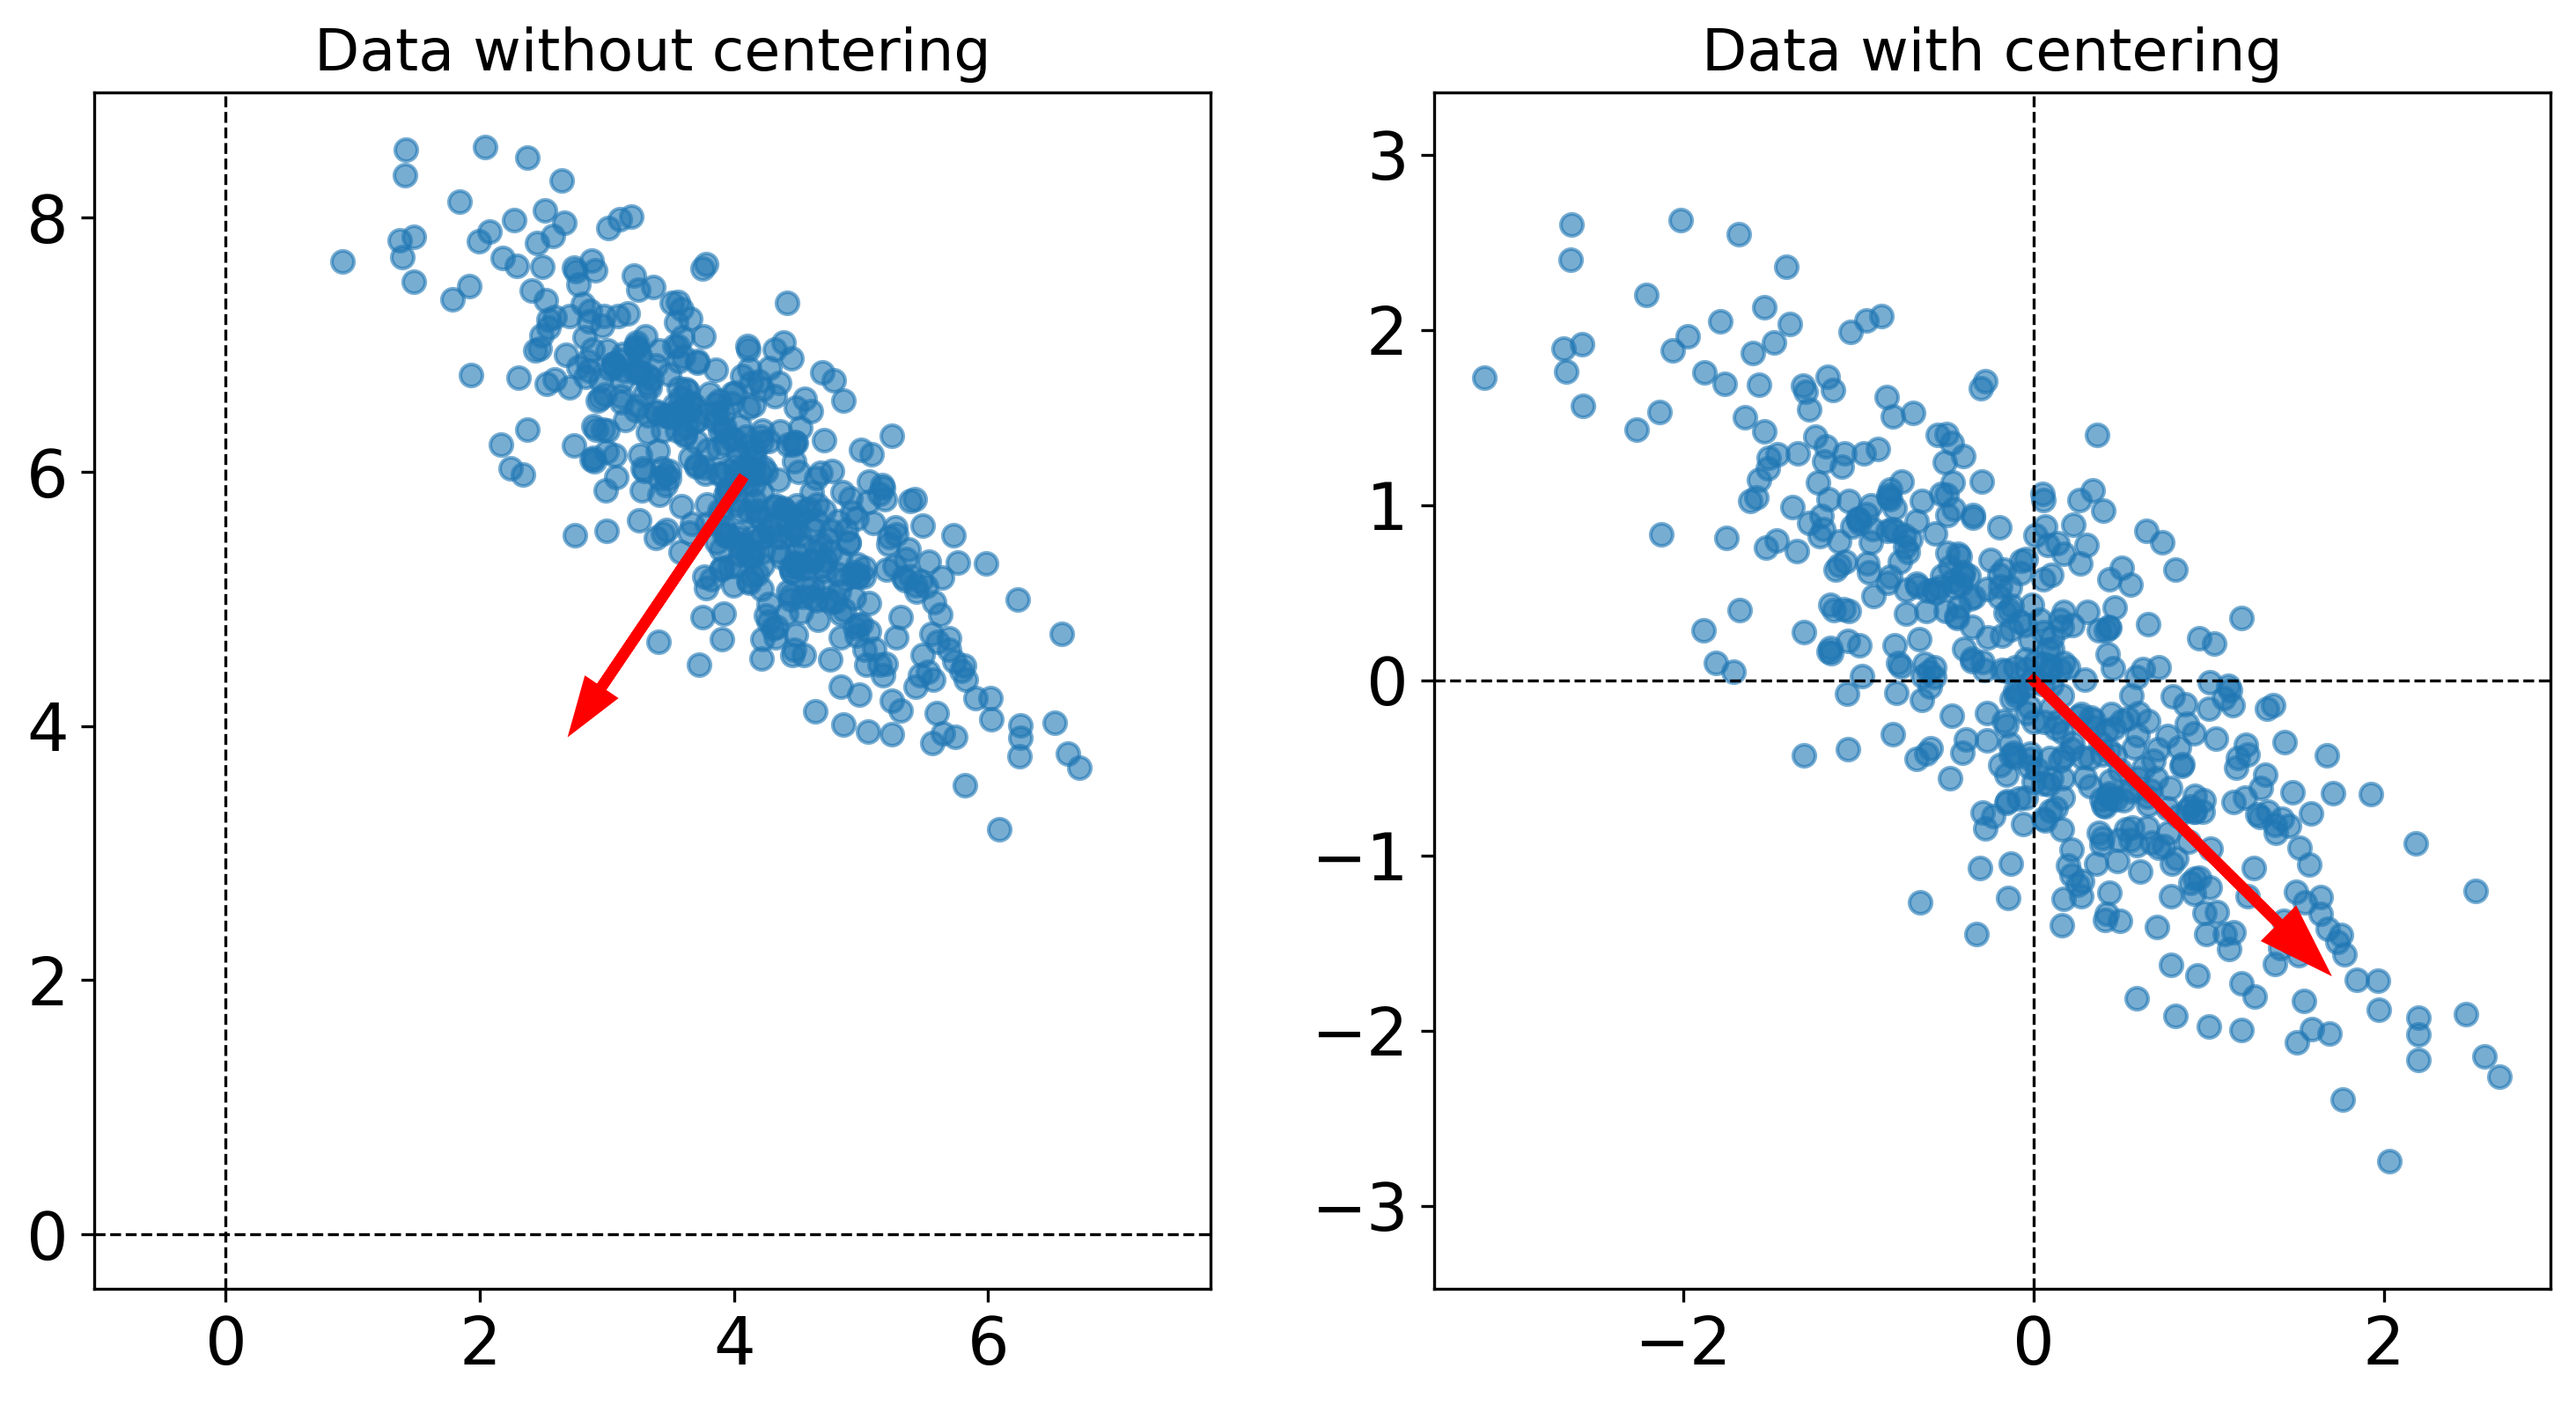

In [5]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)  # for reproducibility
mean = [4, 6]  # non-zero mean
cov = [[1, -0.8], [-0.8, 1]]  # covariance matrix with some correlation
N = 500  # number of data points

# Generate data
data = np.random.multivariate_normal(mean, cov, N)

# First center the data
data_centered = data - np.mean(data, axis=0)

# Perform SVD on the un-centered data
U, S, Vt = np.linalg.svd(data, full_matrices=False)

# Perform SVD on the centered data
Uc, Sc, Vtc = np.linalg.svd(data_centered, full_matrices=False)

# Principal direction is the first column of Vt
principal_direction = Vt[0, :]
principal_directionc = Vtc[0, :]

fig, axes = plt.subplots(1, 2, figsize=(12, 6),dpi=300)

# Without centering
axes[0].scatter(data[:, 0], data[:, 1], alpha=0.6)
axes[0].arrow(np.mean(data[:, 0]), np.mean(data[:, 1]), 
              2*principal_direction[0], 2*principal_direction[1], 
              head_width=0.2, head_length=0.3, fc='red', ec='red', lw=3)
axes[0].set_title('Data without centering',fontsize=16)
axes[0].axhline(0, color='black', linewidth=0.8,linestyle='dashed')
axes[0].axvline(0, color='black', linewidth=0.8,linestyle='dashed')
axes[0].axis('equal')


# With centering
axes[1].scatter(data_centered[:, 0], data_centered[:, 1], alpha=0.6)
axes[1].arrow(0, 0, 2*principal_directionc[0], 2*principal_directionc[1], 
              head_width=0.2, head_length=0.3, fc='red', ec='red', lw=3)
axes[1].axhline(0, color='black', linewidth=0.8,linestyle='dashed')
axes[1].axvline(0, color='black', linewidth=0.8,linestyle='dashed')
axes[1].set_title('Data with centering',fontsize=16)
axes[1].axis('equal')

axes[0].tick_params(axis='both', which='major', labelsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=18)


plt.show()
